In [2]:
import requests
import pandas as pd

url = "https://data.moenv.gov.tw/api/v2/aqx_p_432?api_key=9e565f9a-84dd-4e79-9097-d403cae1ea75&limit=1000&sort=ImportDate desc&format=JSON"
hisurl = "https://data.moenv.gov.tw/api/v2/aqx_p_488?api_key=9b651a1b-0732-418e-b4e9-e784417cadef&limit=1000&sort=datacreationdate desc&format=JSON"

try:
    response = requests.get(url)
    response.raise_for_status()
    response.encoding = "utf-8"
    data = response.json()

    his_response = requests.get(hisurl)
    his_response.raise_for_status()
    his_response.encoding = "utf-8"
    hisdata = his_response.json()

    # 將 records 轉換成 DataFrame
    df = pd.DataFrame(data.get('records', []))
    his_df = pd.DataFrame(hisdata.get('records', []))

    # 存成 CSV
    df.to_csv("即時空氣品質.csv", index=False, encoding='utf-8-sig')
    his_df.to_csv("歷史空氣品質.csv", index=False, encoding='utf-8-sig')

    print("✅ 兩個 CSV 已經存好！")

except requests.RequestException as e:
    print(f"資料抓取失敗: {e}")
except Exception as e:
    print(f"轉換或儲存時發生錯誤: {e}")


資料抓取失敗: Expecting value: line 1 column 1 (char 0)


In [3]:
import requests

url = "https://data.moenv.gov.tw/api/v2/aqx_p_432?api_key=9e565f9a-84dd-4e79-9097-d403cae1ea75&limit=1000&sort=ImportDate desc&format=JSON"
hisurl = "https://data.moenv.gov.tw/api/v2/aqx_p_488?api_key=9b651a1b-0732-418e-b4e9-e784417cadef&limit=1000&sort=datacreationdate desc&format=JSON"

try:
    response = requests.get(url)
    response.raise_for_status()  # 檢查是否回傳錯誤
    response.encoding = "utf-8"
    data = response.json()
    # print(data)

    his_response = requests.get(hisurl)
    his_response.raise_for_status()
    his_response.encoding = "utf-8"
    hisdata = his_response.json()
    # print(hisdata)

except requests.RequestException as e:
    print(f"資料抓取失敗: {e}")


資料抓取失敗: Expecting value: line 1 column 1 (char 0)


In [7]:
import requests

url = "https://data.moenv.gov.tw/api/v2/aqx_p_432?api_key=e8dd42e6-9b8b-43f8-991e-b3dee723a52d&limit=1000&sort=ImportDate desc&format=JSON"
hisurl = "https://data.moenv.gov.tw/api/v2/aqx_p_488?api_key=9b651a1b-0732-418e-b4e9-e784417cadef&limit=1000&sort=datacreationdate desc&format=JSON"

try:
    response = requests.get(url)
    response.raise_for_status()
    response.encoding = "utf-8"
    print("即時資料原始內容：")
    print(response.text[:1000])  # 先印前1000字看看

    his_response = requests.get(hisurl)
    his_response.raise_for_status()
    his_response.encoding = "utf-8"
    print("歷史資料原始內容：")
    print(his_response.text[:1000])

except requests.RequestException as e:
    print(f"資料抓取失敗: {e}")


即時資料原始內容：
{
    "fields": [
        {
            "id": "sitename",
            "type": "text",
            "info": {
                "label": "測站名稱"
            }
        },
        {
            "id": "county",
            "type": "text",
            "info": {
                "label": "縣市"
            }
        },
        {
            "id": "aqi",
            "type": "text",
            "info": {
                "label": "空氣品質指標"
            }
        },
        {
            "id": "pollutant",
            "type": "text",
            "info": {
                "label": "空氣污染指標物"
            }
        },
        {
            "id": "status",
            "type": "text",
            "info": {
                "label": "狀態"
            }
        },
        {
            "id": "so2",
            "type": "text",
            "info": {
                "label": "二氧化硫（ppb）"
            }
        },
        {
            "id": "co",
            "type": "text",
            "info": {
             

In [5]:
with open("hisdata_raw.json", "w", encoding="utf-8") as f:
    f.write(his_response.text)

print("已經將歷史資料存成 hisdata_raw.json，請打開檢查內容！")


已經將歷史資料存成 hisdata_raw.json，請打開檢查內容！


In [8]:
with open("data_raw.json", "w", encoding="utf-8") as f:
    f.write(response.text)

print("已經將資料存成 data_raw.json，請打開檢查內容！")

已經將資料存成 data_raw.json，請打開檢查內容！


In [5]:
import requests
import json
import pandas as pd

def fetch_and_save_json(url, filename):
    try:
        response = requests.get(url)
        response.raise_for_status()
        response.encoding = "utf-8"

        # 檢查是不是 JSON
        if not response.headers.get('Content-Type', '').startswith('application/json'):
            print("⚠️ 回傳非 JSON，可能伺服器在維護或出錯！")
            with open(f"{filename}_raw.html", "w", encoding="utf-8") as f:
                f.write(response.text)
            return

        try:
            data = response.json()
            df = pd.DataFrame(data.get("records", []))
            df.to_csv(f"{filename}.csv", index=False, encoding='utf-8-sig')
            print(f"✅ {filename}.csv 已經存好！")

        except json.JSONDecodeError as e:
            print(f"⚠️ JSON 解碼失敗：{e}")
            with open(f"{filename}_error.json", "w", encoding="utf-8") as f:
                f.write(response.text)
            print(f"⚠️ 原始資料已存檔，請檢查 {filename}_error.json。")

    except requests.RequestException as e:
        print(f"❌ 網路請求失敗: {e}")

# API網址
url = "https://data.moenv.gov.tw/api/v2/aqx_p_432?api_key=9e565f9a-84dd-4e79-9097-d403cae1ea75&limit=1000&sort=ImportDate desc&format=JSON"
hisurl = "https://data.moenv.gov.tw/api/v2/aqx_p_488?api_key=9b651a1b-0732-418e-b4e9-e784417cadef&limit=1000&sort=datacreationdate desc&format=JSON"

# 抓取並儲存
fetch_and_save_json(url, "即時空氣品質")
fetch_and_save_json(hisurl, "歷史空氣品質")


✅ 即時空氣品質.csv 已經存好！
✅ 歷史空氣品質.csv 已經存好！


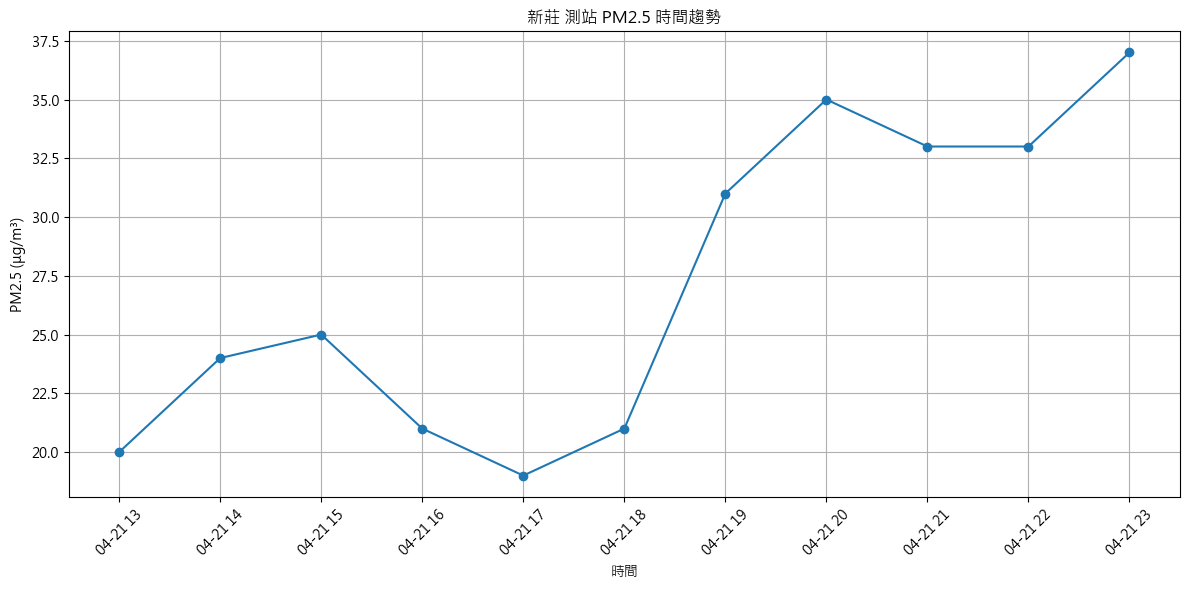

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft JhengHei'

# 讀取CSV
df = pd.read_csv("歷史空氣品質.csv")

# 確保時間排序
df['datacreationdate'] = pd.to_datetime(df['datacreationdate'], errors='coerce')
df = df.dropna(subset=['datacreationdate'])
df = df.sort_values('datacreationdate')

# 選擇特定測站名稱 (例如: 新莊)
station_name = "新莊"
station_data = df[df['sitename'] == station_name]

# 畫 PM2.5 時間折線圖
plt.figure(figsize=(12, 6))
plt.plot(station_data['datacreationdate'], station_data['pm2.5'], marker='o', linestyle='-')
plt.title(f"{station_name} 測站 PM2.5 時間趨勢")
plt.xlabel("時間")
plt.ylabel("PM2.5 (μg/m³)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2025-04-22 01:06:13.039 
  command:

    streamlit run C:\Users\azh85\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

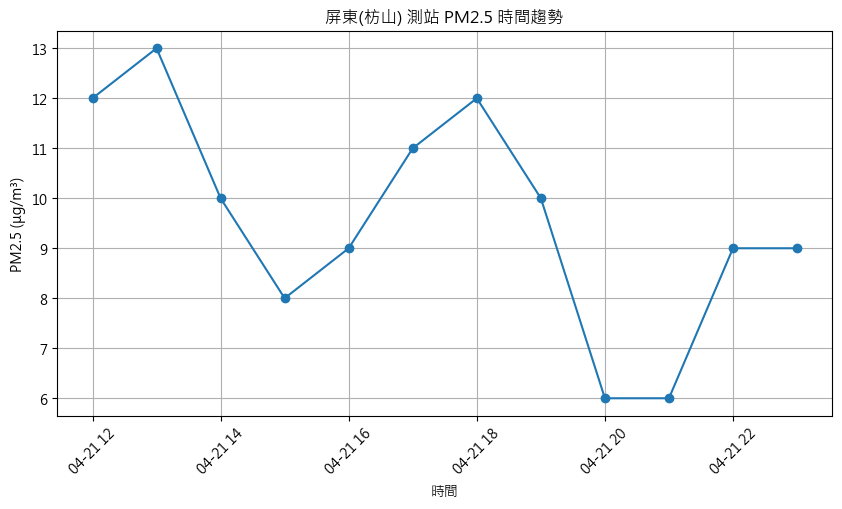

In [8]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# 設定中文字型
plt.rcParams['font.family'] = 'Microsoft JhengHei'

# 讀取CSV
df = pd.read_csv("歷史空氣品質.csv")

# 時間格式處理
df['datacreationdate'] = pd.to_datetime(df['datacreationdate'], errors='coerce')
df['pm2.5'] = pd.to_numeric(df['pm2.5'], errors='coerce')

# 下拉選單：選擇測站
stations = df['sitename'].dropna().unique()
station = st.selectbox('請選擇測站', stations)

# 篩選資料
filtered = df[df['sitename'] == station].sort_values('datacreationdate')

# 畫圖
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(filtered['datacreationdate'], filtered['pm2.5'], marker='o', linestyle='-')
ax.set_title(f"{station} 測站 PM2.5 時間趨勢")
ax.set_xlabel("時間")
ax.set_ylabel("PM2.5 (μg/m³)")
ax.grid(True)
plt.xticks(rotation=45)

# 顯示圖表
st.pyplot(fig)


In [1]:
import base64

# 把字型檔讀進來
with open("Microsoft JhengHei.ttf", "rb") as f:
    font_data = f.read()

# 轉成 Base64
base64_font = base64.b64encode(font_data).decode('utf-8')

# 印出來複製
print(base64_font)


FileNotFoundError: [Errno 2] No such file or directory: 'Microsoft JhengHei.ttf'